In [1]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})
import numpy as np

<Figure size 432x288 with 0 Axes>

In [6]:
import os

In [123]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [127]:
# !ls /Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0aM08c025_96_fine/q18a0aM08c025_96_fine
!ls /Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData

q10S0                 q18a0a0c025_96_fine   q4a0a0
q18a0a0c025_120       q18a0aM04c025_96_fine q8S0
q18a0a0c025_144       q18a0aM08c025_96_fine


In [141]:
root_dir={}
root_dir['a0'] = "/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_144/q18a0a0c025_144"
root_dir['am04'] = "/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0aM04c025_96_fine/q18a0aM04c025_96_fine"
root_dir['am08'] = "/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0aM08c025_96_fine/q18a0aM08c025_96_fine"

In [142]:
htraj1={}
htraj2={}
htraj1['a0'] = np.loadtxt(os.path.join(root_dir['a0'], 'htraj_1.gz'))
htraj2['a0'] = np.loadtxt(os.path.join(root_dir['a0'], 'htraj_2.gz'))

htraj1['am04'] = np.loadtxt(os.path.join(root_dir['am04'], 'htraj_1.gz'))
htraj2['am04'] = np.loadtxt(os.path.join(root_dir['am04'], 'htraj_2.gz'))

htraj1['am08'] = np.loadtxt(os.path.join(root_dir['am08'], 'htraj_1.gz'))
htraj2['am08'] = np.loadtxt(os.path.join(root_dir['am08'], 'htraj_2.gz'))

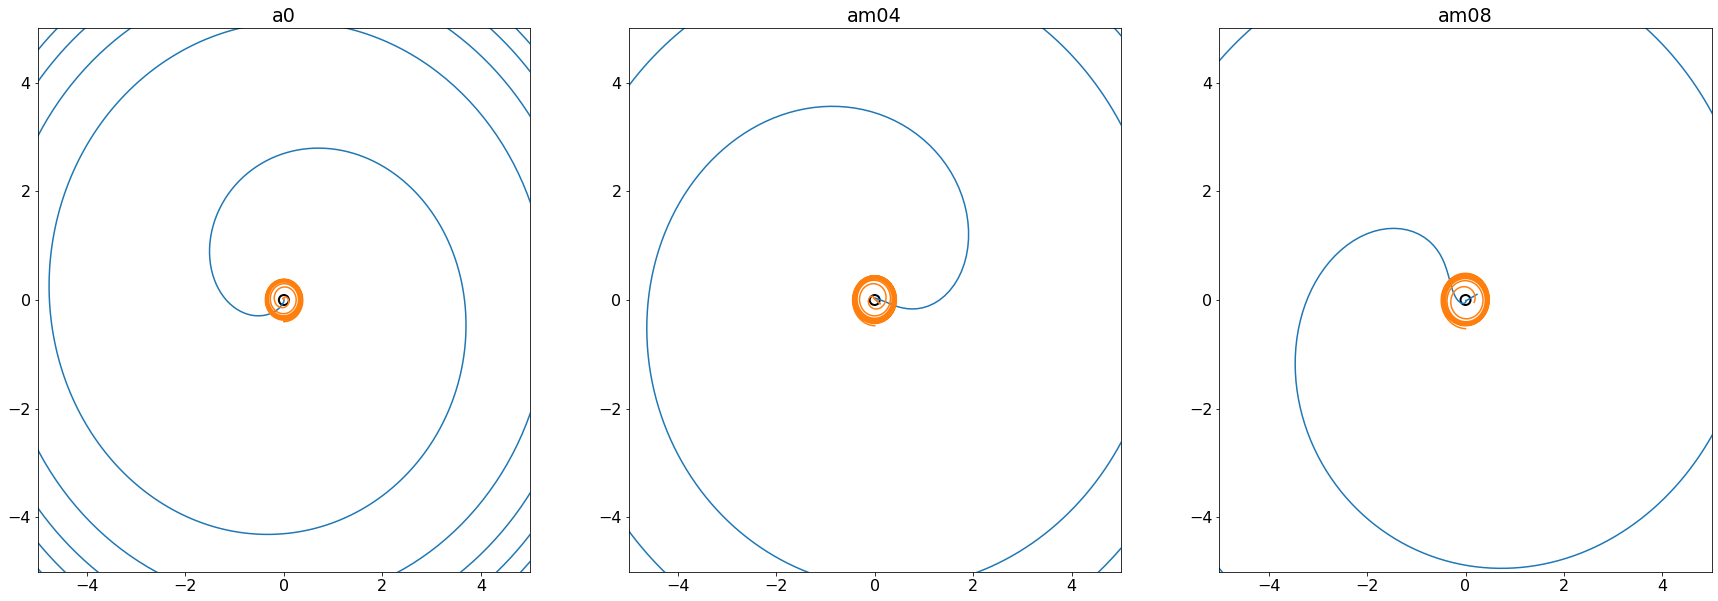

In [267]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

for i, n in enumerate(htraj1.keys()):

    axs[i].plot(htraj1[n][:,1], htraj1[n][:,2])
    axs[i].plot(htraj2[n][:,1], htraj2[n][:,2])
    
    axs[i].scatter([0],[0], s=100, fc='none', ec='k', lw=2)
    
    axs[i].set_title(n)
    
    axs[i].set_xlim(-5,5)
    axs[i].set_ylim(-5,5)
    # axs[i].set_xlim(-1,1)
    # axs[i].set_ylim(-1,1)
    # axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
htraj1[n][:,1], htraj1[n][:,2]

In [ ]:
htraj2[n][:,1], htraj2[n][:,2]

In [149]:
[len(htraj1[n][:,1]) for n in htraj1.keys()]

[3806, 3863, 3755]

In [150]:
[len(htraj2[n][:,1]) for n in htraj2.keys()]

[3810, 3933, 3755]

In [157]:
def resample_bbh(h1, h2):
    t1 = h1[:,0]
    t2 = h2[:,0]
    
    common_t_start = np.max([t1[0], t2[0]])
    common_t_end = np.min([t1[-1], t2[-1]])
    dt = t1[1]-t1[0]
    new_t = np.arange(common_t_start, common_t_end, dt)
    
    x1 = IUS(t1, h1[:,1])(new_t)
    y1 = IUS(t1, h1[:,2])(new_t)
    z1 = IUS(t1, h1[:,3])(new_t)
    
    x2 = IUS(t2, h2[:,1])(new_t)
    y2 = IUS(t2, h2[:,2])(new_t)
    z2 = IUS(t2, h2[:,3])(new_t)
    
    return new_t, np.c_[x1, y1, z1], np.c_[x2, y2, z2]

In [165]:
ts={}
h1s={}
h2s={}
for n in htraj1.keys():
    ts[n], h1s[n], h2s[n] = resample_bbh(htraj1[n], htraj2[n])

In [257]:
seps = {}
for n in ts.keys():
    r1 = np.sqrt(h1s[n][:,0]**2 + h1s[n][:,1]**2)
    r2 = np.sqrt(h2s[n][:,0]**2 + h2s[n][:,1]**2)
    seps[n] = r1-r2

In [258]:
# first index where sep is 0
np.arange(len(seps['a0']))[seps['a0']<1][0]

2948

In [259]:
np.arange(len(seps['am04']))[seps['am04']<1][0]

2847

In [260]:
np.arange(len(seps['am08']))[seps['am08']<1][0]

3177

In [264]:
plt.figure(figsize=(10,10))
plt.plot(ts['a0']-ts['a0'][2949], seps['a0'])
plt.plot(ts['am04']-ts['am04'][2848], seps['am04'])
plt.plot(ts['am08']-ts['am08'][3178], seps['am08'])
plt.xlim(-100,100)

(-100.0, 100.0)

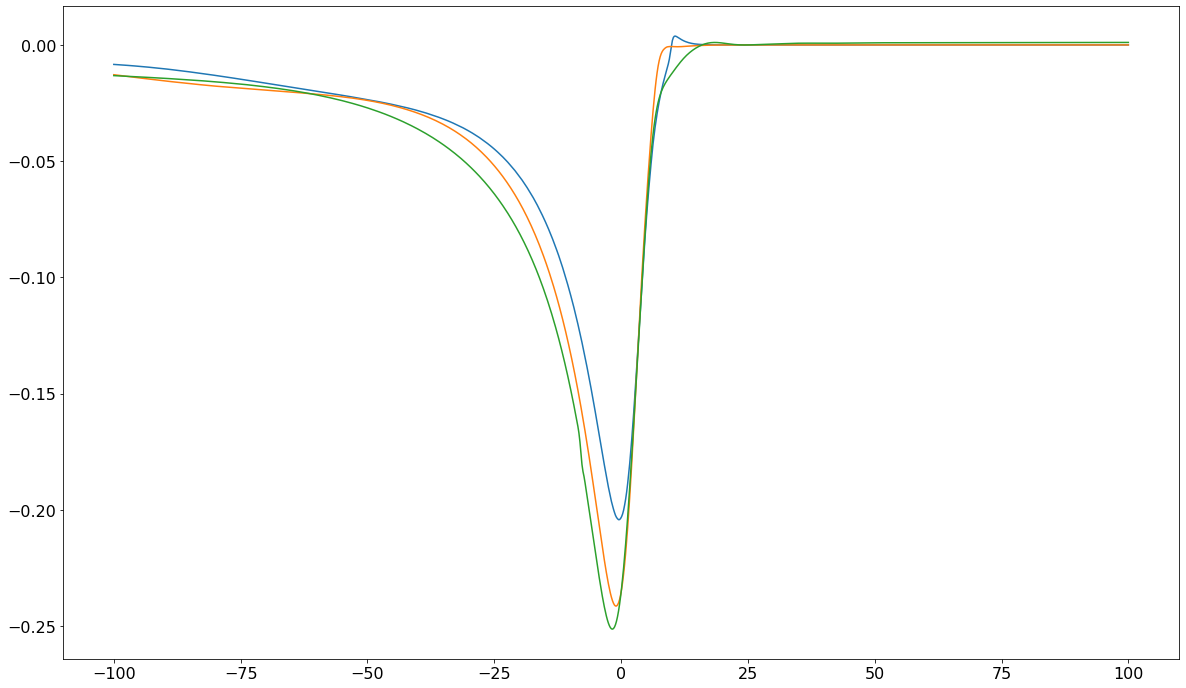

In [266]:
new_t = np.linspace(-100, 100, 1000)
aligned_seps = {}
aligned_seps['a0'] = IUS(ts['a0']-ts['a0'][2949], seps['a0'])
aligned_seps['am04'] = IUS(ts['am04']-ts['am04'][2848], seps['am04'])
aligned_seps['am08'] = IUS(ts['am08']-ts['am08'][3178], seps['am08'])

plt.figure(figsize=(20,12))
plt.plot(new_t, aligned_seps['a0'].derivative(1)(new_t))
plt.plot(new_t, aligned_seps['am04'].derivative(1)(new_t))
plt.plot(new_t, aligned_seps['am08'].derivative(1)(new_t))